# Parametric Tutorial
**NOTE** 
This notebook is not meant to teach statistics, but only demo how to run the py50 functions. There are plenty of resources available online. I particularly found introductory [tutorials by DATAtab](https://datatab.net/tutorial/get-started) helpful. 

The following page will show examples of parametric tests using the Stats() and Plots() modules of py50. There are many plot features available for py50, but they will not all be demoed here. Instead, to see all the plots available, take a look at the [006_statistics_quickstart](https://github.com/tlint101/py50/blob/main/tutorials/006_statistics_quickstart.ipynb). As py50 is built on top of Pingouin, additional examples with ANOVA tests can be found [here](https://github.com/raphaelvallat/pingouin/blob/main/notebooks/01_ANOVA.ipynb). 

In [1]:
from py50 import Stats, Plots
import pingouin as pg

In [2]:
## List Datasets available from Pingouin
# pg.list_dataset()

# Read Dataset
df = pg.read_dataset('penguins')

# Initialize Stats and Plots
stats = Stats(df)
plot = Plots(df)

print('List of Group names in Dataset:', df['species'].unique())
stats.show()

List of Group names in Dataset: ['Adelie' 'Chinstrap' 'Gentoo']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


### Data Distribution
The data distribution is important to determine patterns that may show up in the dataset. For example, it can also tell you how often a value may occur, the shape of the data, variability of a value, etc. 

py50 includes two tests that can help analyze the dataset. 
- Normality. This will test if the dataset follows normal distribution - i.e. a bell-shape curve.
- Homoscedasticity. This will test for the "spread" or consistency of the dataset along a regression model. 

In [3]:
# Test for normality
stats.get_normality(value_col='body_mass_g', group_col='species').round(3)

,W,pval,normal
species,,,
Adelie,0.981,0.032,False
Chinstrap,0.984,0.561,True
Gentoo,0.986,0.234,True


In [4]:
stats.get_homoscedasticity(value_col='body_mass_g', group_col='species').round(3)

,W,pval,equal_var
levene,NaN,NaN,False


### Perform ANOVA
Several tests, parametric and non-parametric, are available in py50. The functions use the "get_x" format, where x is the name of said test. Here, the One-Way ANOVA script will be demoed. The final table will be a Pandas.DataFrame object. 

In [5]:
anova = stats.get_anova(value_col='body_mass_g', group_col='species')
anova

,Source,ddof1,ddof2,F,p-unc,np2,significance
0,species,2,339,343.626275,2.892368e-82,0.669672,****


### Tukey

py50 comes with several post-hoc tests. Again, this can be called using the same 'get_x' phrase. As the above ANOVA test show significance between the Hair color group, a Tukey test will be performed. 

In [6]:
tukey = stats.get_tukey(value_col='body_mass_g', group_col='species').round(4)
tukey

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges,significance
0,Adelie,Chinstrap,3700.6623,3733.0882,-32.426,67.5117,-0.4803,0.8807,-0.0739,n.s.
1,Adelie,Gentoo,3700.6623,5076.0163,-1375.354,56.1480,-24.4952,0.0000,-2.8602,****
2,Chinstrap,Gentoo,3733.0882,5076.0163,-1342.928,69.8569,-19.2240,0.0000,-2.8753,****


The tukey results can be plotted as follows:

The parameters for all plots in py50 are created to be as similar as possible. For each plot, there is also an option to "return_df". This parameter will output the calculated dataframe that was used to create the plot. Users can use this to compare to the plot generated using the Stats() module to check for any inconsistencies. 

(           A          B      mean(A)      mean(B)         diff         se  \
 0     Adelie  Chinstrap  3700.662252  3733.088235   -32.425984  67.511684   
 1     Adelie     Gentoo  3700.662252  5076.016260 -1375.354009  56.147971   
 2  Chinstrap     Gentoo  3733.088235  5076.016260 -1342.928025  69.856928   
 
            T       p-tukey    hedges significance  
 0  -0.480302  8.806666e-01 -0.073946         n.s.  
 1 -24.495169  1.443290e-14 -2.860201         ****  
 2 -19.223978  1.443290e-14 -2.875327         ****  ,
 <statannotations.Annotator.Annotator at 0x14fbbecd0>)

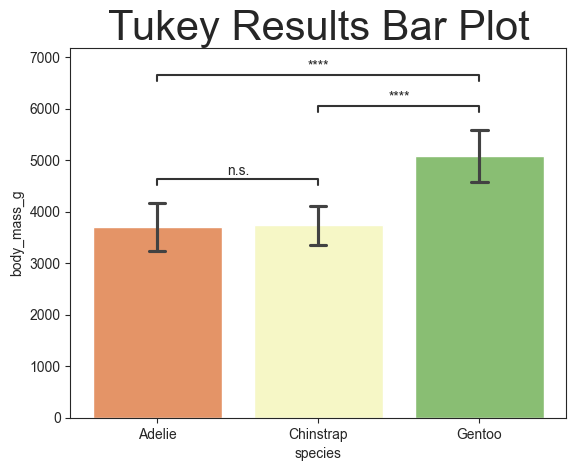

In [7]:
title = 'Tukey Results Bar Plot'

plot.barplot(test='tukey', value_col='body_mass_g', group_col='species', palette='RdYlGn', title=title, fontsize=30,
             return_df=True)

# Welch ANOVA

Welch ANOVA is used for when the Homoscedasticity is false. In other words, if the datasets does not look consistent. The get_welch_anova() function can be tested usign the same Penguin dataset used above. 

In [8]:
# welch = stats.get_welch_anova(data, value_col='body_mass_g', group_col='species').round(4)
welch = stats.get_welch_anova(value_col='body_mass_g', group_col='species')
welch

,Source,ddof1,ddof2,F,p-unc,np2,significance
0,species,2,189.478413,317.572267,3.093701e-61,0.669672,****


### Games-Howell Post-Hoc Test

Again, after the ANOVA test, a post-hoc test should be used to tell significance between groups. Games-Howell can be used to handle situations with inconsistent datasets - i.e. Homoscedasticity is false.

In [9]:
gameshowell = stats.get_gameshowell(value_col='body_mass_g', group_col='species')
gameshowell

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,significance
0,Adelie,Chinstrap,3700.662252,3733.088235,-32.425984,59.706437,-0.543090,152.454796,0.850154,-0.073946,n.s.
1,Adelie,Gentoo,3700.662252,5076.016260,-1375.354009,58.810929,-23.386028,249.642554,0.000000,-2.860201,****
2,Chinstrap,Gentoo,3733.088235,5076.016260,-1342.928025,65.102843,-20.627794,170.404362,0.000000,-2.875327,****


The post-hoc results can be plotted using py50. Her there are specific pairs denoted for plotting. This would remove the pairs that have no significance (n.s.). If the return_df=True, then the returned table will only contain the pairs annotated on the plot. 

(           A       B      mean(A)     mean(B)         diff         se  \
 1  Chinstrap  Gentoo  3733.088235  5076.01626 -1342.928025  65.102843   
 0     Adelie  Gentoo  3700.662252  5076.01626 -1375.354009  58.810929   
 
            T          df  pval    hedges significance  
 1 -20.627794  170.404362   0.0 -2.875327         ****  
 0 -23.386028  249.642554   0.0 -2.860201         ****  ,
 <statannotations.Annotator.Annotator at 0x1680e5880>)

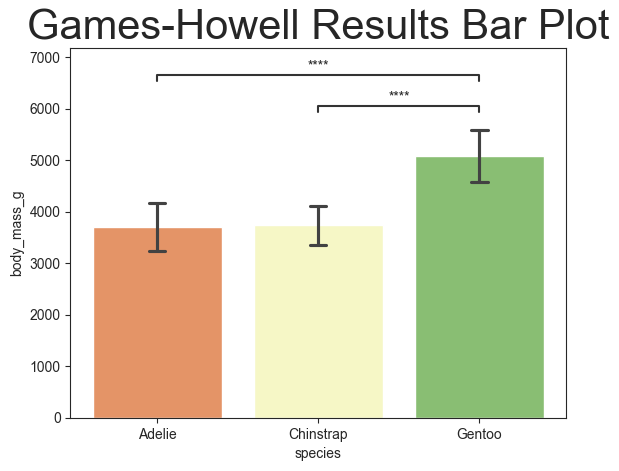

In [10]:
title = 'Games-Howell Results Bar Plot'
pairs = [('Gentoo', 'Chinstrap'), ('Adelie', 'Gentoo')]

plot.barplot(test='gameshowell', value_col='body_mass_g', group_col='species', palette='RdYlGn', title=title,
             fontsize=30, return_df=True, pairs=pairs)

# Repeated Measures

Repeated measures is used to analyze within-subjects or within-groups factors. Can be used when the subjects are measured under different conditions or time points. Examples for the get_rm_anova() function uses the 'rm_anova' dataset from pingouin as follows:

In [11]:
repeated_m = pg.read_dataset('rm_anova')
repeated_m.dropna(subset=['Gender'], inplace=True)

rm_stats = Stats(repeated_m)
rm_plots = Plots(repeated_m)
rm_stats.show()

,Subject,Gender,Region,Education,DesireToKill,Disgustingness,Frighteningness
0,1,Female,North,some,10.0,High,High
1,1,Female,North,some,9.0,High,Low
2,1,Female,North,some,6.0,Low,High
3,1,Female,North,some,6.0,Low,Low
4,2,Female,North,advance,10.0,High,High


In [12]:
repeated_measures = rm_stats.get_rm_anova(value_col='DesireToKill', within_subject_col='Disgustingness',
                                          subject_col='Subject')
repeated_measures

,Source,ddof1,ddof2,F,p-unc,ng2,eps,significance
0,Disgustingness,1,91,11.876684,0.000862,0.025827,1.0,***


# Pairwise tests for repeated measures

The guidelines found on [Pingouin](https://pingouin-stats.org/build/html/guidelines.html#id5) suggest pairwise_tests(). py50 warps this function in the get_pairwise_rm() function. The results can also be used to plot hte results. 

**NOTE:** Depending on the data, it may also be feasible to use the Tukey test. 

In [13]:
pairwise_test = rm_stats.get_pairwise_rm(value_col='DesireToKill', within_subject_col='Disgustingness',
                                         subject_col='Subject')
pairwise_test

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges,significance
0,Disgustingness,High,Low,True,True,3.446257,91.0,two-sided,0.000862,26.262,0.322536,***


(         Contrast     A    B  Paired  Parametric         T        dof  \
 0  Disgustingness  High  Low   False        True  2.595165  360.18469   
 
   alternative     p-unc   BF10    hedges significance  
 0   two-sided  0.009841  2.899  0.271888           **  ,
 <statannotations.Annotator.Annotator at 0x16827cac0>)

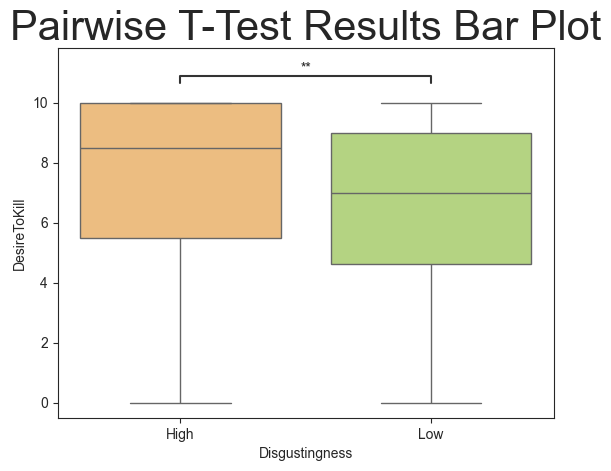

In [14]:
title = 'Pairwise T-Test Results Bar Plot'

rm_plots.boxplot(test='pairwise-rm', value_col='DesireToKill', group_col='Disgustingness', subject_col='Subject',
                 palette='RdYlGn', title=title, fontsize=30, return_df=True)

# Mixed ANOVA
Mixed ANOVA can be used to analyze data with mixed design - both within and between group factors. The function uses the py50 standard as seen in the above examples. The example here will use the 'mixed_anova' dataset from Pingouin.


In [15]:
data = pg.read_dataset('mixed_anova')
mixed_stats = Stats(data)
mixed_plot = Plots(data)

mixed_stats.show()

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4


In [16]:
mixed = mixed_stats.get_mixed_anova(value_col='Scores', group_col='Group', within_subject_col='Time',
                                    subject_col='Subject')
mixed

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps,significance
0,Group,5.459963,1,58,5.459963,5.051709,0.028420,0.080120,NaN,*
1,Time,7.628428,2,116,3.814214,4.027394,0.020369,0.064929,0.998751,*
2,Interaction,5.167192,2,116,2.583596,2.727996,0.069545,0.044922,NaN,n.s.


The guidelines found on [Pingouin](https://pingouin-stats.org/build/html/guidelines.html#id5) suggest pairwise_tests(). That can also be used. But depending on the dataset, it may be more prudent to use the tukey test. That is easy to use, as we have seen above. The Tukey test will be performed and the corresponding barplot() will be generated. 

In [17]:
pairwise_test = mixed_stats.get_tukey(value_col='Scores', group_col='Group')
pairwise_test

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges,significance
0,Control,Meditation,5.567851,5.91618,-0.348328,0.152115,-2.289903,0.0232,-0.339918,*


(         A           B   mean(A)  mean(B)      diff        se         T  \
 0  Control  Meditation  5.567851  5.91618 -0.348328  0.152115 -2.289903   
 
    p-tukey    hedges significance  
 0   0.0232 -0.339918            *  ,
 <statannotations.Annotator.Annotator at 0x1681e3730>)

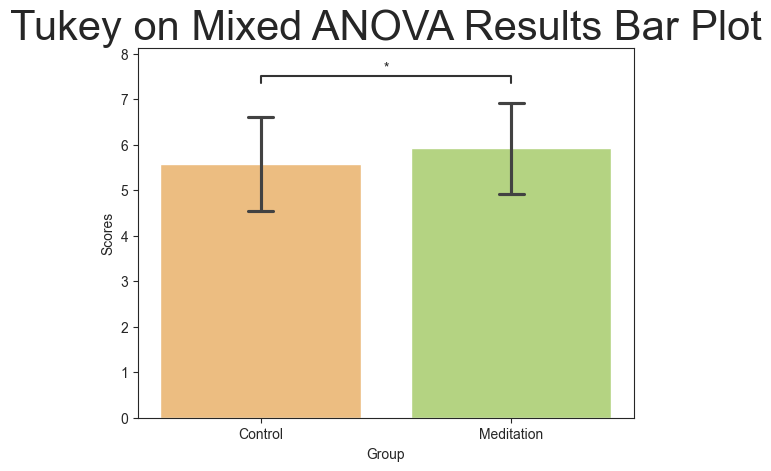

In [18]:
title = 'Tukey on Mixed ANOVA Results Bar Plot'

mixed_plot.barplot(test='tukey', value_col='Scores', group_col='Group', palette='RdYlGn', title=title, fontsize=30,
                   return_df=True)